$$
f(x) = \int_{-\infty}^{\infty} e^{-x^2} dx
$$

In [ ]:
import math
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.rcParams.update({'axes.grid': True})  # Enable grid globally for better visualization

In [2]:
def template_plot_function(ax, time, values, color, label, title, xlabel=None, ylabel=None):
    """
    Função genérica para plotar gráficos.

    Args:
        ax (matplotlib.axes.Axes): Objeto do eixo onde o gráfico será plotado.
        time (np.ndarray): Valores de tempo.
        values (np.ndarray): Valores da função a serem plotados.
        color (str): Cor da linha do gráfico.
        label (str): Rótulo da legenda.
        title (str): Título do gráfico.
        xlabel (str, optional): Rótulo do eixo X. Default é None.
        ylabel (str, optional): Rótulo do eixo Y. Default é None.
    """
    ax.plot(time, values, color, linewidth=2, label=label)
    ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
    ax.axvline(0, color='black', linewidth=0.8, linestyle='--')
    ax.legend()
    ax.grid(True)

In [3]:
def define_unit_step():
    """
    Define a função degrau unitário simbolicamente.

    Returns:
        tuple: Variável de tempo e a função degrau unitário.
    """
    t = sp.symbols('t', real=True)
    u = sp.Heaviside(t)
    return t, u

def numeric_unit_step(t_values):
    """
    Implementação numérica do degrau unitário.

    Args:
        t_values (np.ndarray): Valores de tempo para calcular o degrau unitário.
    
    Returns:
        np.ndarray: Valores do degrau unitário correspondentes aos valores de tempo.
    """
    return np.where(t_values >= 0, 1.0, 0.0)

In [4]:
def define_unit_pulse(width=1):
    """
    Define a função pulso retangular simbolicamente.
    Pulso retangular é u(t) - u(t-width)

    Arg:
        width (int): Largura do pulso retangular. Default é 1.

    Returns:
        tuple: (t, pulse) onde t é a variável simbólica e pulse é a função pulso retangular.
    """
    t = sp.symbols('t', real=True)
    pulse = sp.Heaviside(t) - sp.Heaviside(t - width)
    return t, pulse


def numeric_unit_pulse(t_values, width=1):
    """
    Implementação numérica do pulso retangular.

    Arg:
        t_values (np.ndarray): Valores de tempo.
        width (int): Largura do pulso retangular. Default é 1.

    Returns:
        np.ndarray: Valores da função pulso retangular.
    """
    return np.where((t_values >= 0) & (t_values < width), 1.0, 0.0)


In [5]:
def define_unit_impulse():
    """
    Define a função impulso unitário (delta de Dirac) simbolicamente.
    
    Returns:
        t (sympy.Symbol): Variável simbólica de tempo.
        impulse (sympy.DiracDelta): Função impulso unitário.
    """
    t = sp.symbols('t', real=True)
    impulse = sp.DiracDelta(t)
    return t, impulse


def numeric_unit_impulse(t_values, epsilon=0.1):
    """
    Aproximação numérica do impulso unitário.
    Usamos uma função triangular com área 1.

    Args:
        t_values (np.ndarray): Valores de tempo onde calcular a função impulso.
        epsilon (float): Largura da função triangular.
    
    Returns:
        np.ndarray: Aproximação do impulso unitário.
    """
    # Criamos uma aproximação do delta usando uma função triangular
    result = np.zeros_like(t_values, dtype=float)
    mask = np.abs(t_values) < epsilon
    result[mask] = 1.0 / epsilon * (1 - np.abs(t_values[mask]) / epsilon)
    return result

In [6]:
def laplace_transform(function, t):
    """
    Calcula a transformada de Laplace da função dada.

    Args:
        function (sympy expression): Função a ser transformada.
        t (sympy.Symbol): Variável de tempo.

    Returns:
        sympy expression: Transformada de Laplace da função.
    """
    # Definindo a variável de Laplace
    s = sp.symbols('s')

    # Tentando calcular a transformada de Laplace
    try:
        transform = sp.laplace_transform(function, t, s, noconds=True)
        return transform
    
    # Caso a função não seja integrável, retornamos None
    except Exception as e:
        print(f"Erro ao calcular a transformada: {e}")
        
        # Para o impulso, a transformada é 1
        if isinstance(function, sp.DiracDelta):
            return 1
        return None

In [7]:
def print_laplace_transforms():
    """
    Calcula e imprime as transformadas de Laplace para degrau, pulso e impulso.
    """
    # Degrau unitário
    t, step = define_unit_step()
    step_transform = laplace_transform(step, t)
    print(f"Transformada de Laplace do degrau unitário u(t): {step_transform}")
    
    # Pulso retangular
    t, pulse = define_unit_pulse(width=1)
    pulse_transform = laplace_transform(pulse, t)
    print(f"Transformada de Laplace do pulso retangular p(t): {pulse_transform}")
    
    # Impulso unitário
    t, impulse = define_unit_impulse()
    impulse_transform = laplace_transform(impulse, t)
    print(f"Transformada de Laplace do impulso unitário δ(t): {impulse_transform}")

In [8]:
def plot_functions(time_range=(-2, 4), num_points=1000):
    """
    Plota o degrau unitário, pulso retangular e impulso no intervalo de tempo especificado.
    """
    # Criar o vetor de tempo para o gráfico
    time = np.linspace(time_range[0], time_range[1], num_points)
    
    # Calcular valores para cada função
    step_values = numeric_unit_step(time)
    pulse_values = numeric_unit_pulse(time, width=1)
    impulse_values = numeric_unit_impulse(time)
    
    # Criar figura com três subplots
    fig = plt.figure(figsize=(12, 10))
    gs = GridSpec(3, 1, figure=fig)

    template_plot_function(fig.add_subplot(gs[0, 0]), time, step_values, 'b', 'u(t)', 'Degrau Unitário', 'Tempo', 'Amplitude')

    template_plot_function(fig.add_subplot(gs[1, 0]), time, pulse_values, 'r', 'p(t)', 'Pulso Retangular', 'Tempo', 'Amplitude')

    template_plot_function(fig.add_subplot(gs[2, 0]), time, impulse_values, 'g', 'δ(t)', 'Impulso Unitário', 'Tempo', 'Amplitude')

    plt.tight_layout()
    plt.show()

Transformada de Laplace do degrau unitário u(t): 1/s
Transformada de Laplace do pulso retangular p(t): 1/s - exp(-s)/s
Transformada de Laplace do impulso unitário δ(t): 1


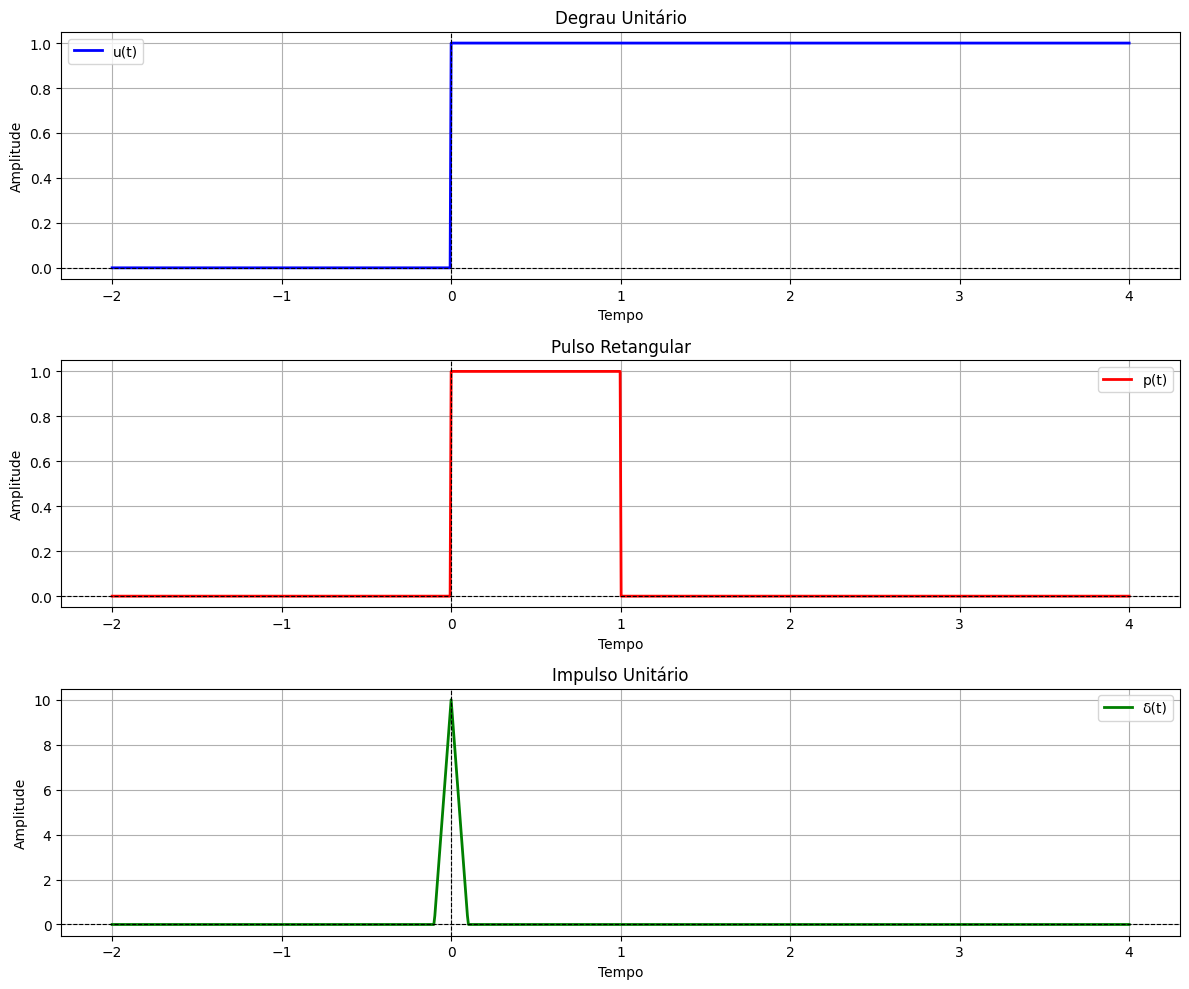

In [9]:
def main():
    # Calcular e imprimir as transformadas de Laplace
    print_laplace_transforms()
    
    # Plotar as funções
    plot_functions()

main()